# Shopify 2022 Data Science Challenge!

# Question 1: Given some sample data, write a program to answer the following: click here to access the required data set.

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b) What metric would you report for this dataset?

c) What is its value?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## First off, load in the dataset to begin exploratory data analysis

In [3]:
d = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [4]:
d

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


## Lets take a look at our data

In [5]:
# Lets look at the overall data statistics
d.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [6]:
# AOV by definition (order amount / number of orders)
d["order_amount"].sum()/5000

3145.128

At first glance: 



*   Given that the shoes are at affordable prices and every store sells one type of shoe, I assume that we are looking for the AOV for the collective 100 stores together , when in reality individual stores would calculate their own AOV values to find insights and make business and marketing plans. Calculating individual store AOV's would consist of summing the total revenue for a respective store divided by the number of orders for that store.



*  A mean/AOV of 3145 dollars is not a reasonable number in terms of average amount paid per order (way too high). This means that on average, a customer pays 3145 dollars when checking out of an "affordable" sneaker store.


*   The standard deviation is 41282 dollars, indicating an extremely wide spread of the order amounts in addition to a max order amount of $704,000...also HUGE.

* Both these reasons are enough to indicate that there is outlier data in the set causing a negative skew.

* Mean of total_items per order is 8.7, lets say 8 shoes, also a bit too much!






At this point:

It is more logical to take the average order value as the MEDIAN or the MODE. This is a more accurate representation of the average amount spent per order, and a better number to base any future marketing or business plans on!

## Check the data to ensure no **duplicate** or **missing** data so we can proceed with analysis

In [10]:
#check if we have null entries in any columns or duplicates by checking if any order_id is repeated.
print("Null data entries")
print(d.isnull().sum())
print("The amount of orders duplicated is",d['order_id'].duplicated().sum())

Null data entries
order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64
The amount of orders duplicated is 0


In [9]:
d.astype('object').describe()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
count,5000,5000,5000,5000,5000,5000,5000
unique,5000,100,301,258,8,3,4991
top,1,53,718,153,2,credit_card,2017-03-28 4:00:00
freq,1,68,28,87,1832,1735,3


### The **unique identifier** in each row is the order_id column. With a confirmed 100 unique shop_ids.

In [10]:
print("The median order amount is",d['order_amount'].median())
print("The mode order amount is",d['order_amount'].mode())

The median order amount is 284.0
The mode order amount is 0    153
dtype: int64


In [11]:
(d['order_amount'] == 153).value_counts()

False    4913
True       87
Name: order_amount, dtype: int64

### After checking over the median and mode of the data, I found a mode of 153 dollars, repeated 87 times out of 258 unique order amounts and a median of 284 dollars.

In [12]:
#just checking the max amount spent for one customer in the data. You can tell this would skew the data!
d[["order_amount","total_items"]].max()

order_amount    704000
total_items       2000
dtype: int64

## A clearly skewed histogram of the order amount data!

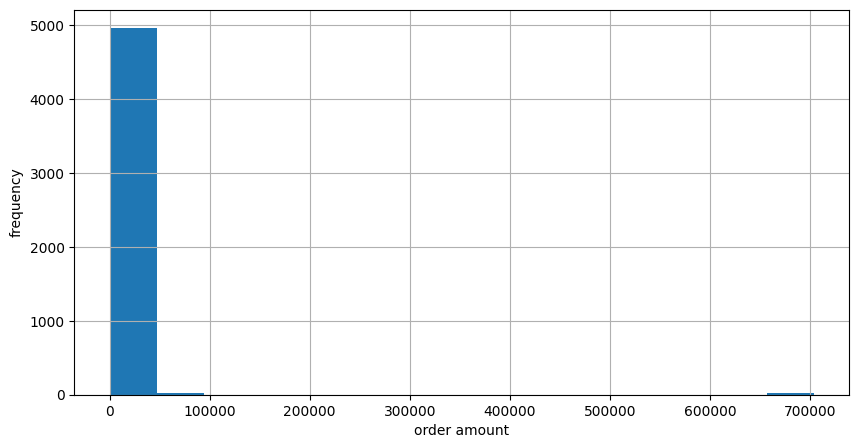

In [13]:
# A histogram to look at the order amount column distribution. Negative skew, clear outlier present.
plt.style.use('default')
plt.xlabel("order amount")
plt.ylabel("frequency")
d['order_amount'].hist(bins=15, figsize=(10,5))
plt.show()

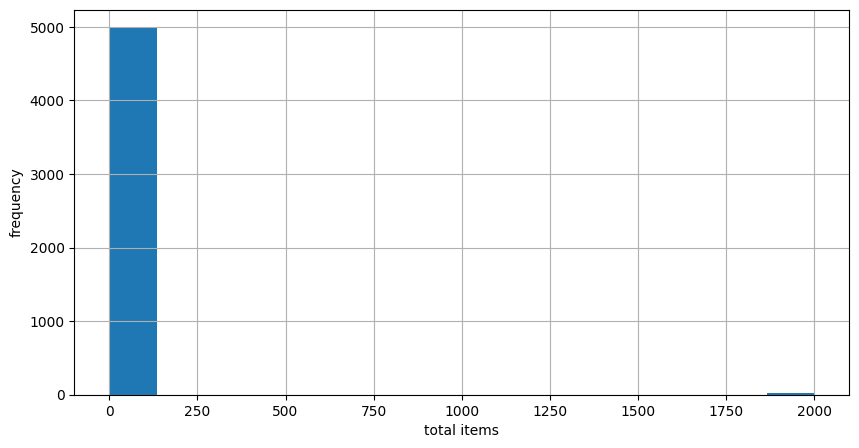

In [14]:
#Histogram of total items mimics order amount, proves that the price per order at the sneaker shops is more or less the same.
plt.style.use('default')
plt.xlabel("total items")
plt.ylabel("frequency")
d['total_items'].hist(bins=15, figsize=(10,5))
plt.show()

## A boxplot of the order amount data, portraying clear anomolies

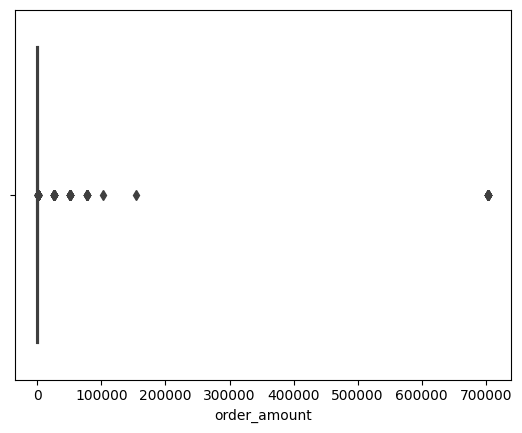

In [15]:
# A box and whisker plot for order amount, indicating the clear outlier data presence
sns.boxplot(x=d['order_amount'])

## Eliminating Order Amount Outliers via IQR (Not the best option as I soon came to realize)

In [58]:
#Calculating the IQR value of order amount
q1 = d.describe()['order_amount']['25%']
q3 = d.describe()['order_amount']['75%']
IQR = q3 - q1
print(IQR)

227.0


In [59]:
#low and high boolean dataframes represeting True amount of data points that are OUT of the IQR. So outliers if True.
iqr_out_low = (d['order_amount'] < (q1 - 1.5 * IQR))
iqr_out_high = d['order_amount'] > (q3 + 1.5 * IQR)

In [60]:
#No value out of IQR on the low end.
iqr_out_low.value_counts()

False    5000
Name: order_amount, dtype: int64

In [61]:
#141 order amounts out of the IQR on the high end.
iqr_out_high.value_counts()

False    4859
True      141
Name: order_amount, dtype: int64

## In order to look at the data with, presumabley, unrealistic order amounts...I viewed the first 141 rows of the dataframe in descending order

In [62]:
d.sort_values(by='order_amount',ascending=False).head(141)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount per item
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
...,...,...,...,...,...,...,...,...
1503,1504,11,904,736,4,debit,2017-03-06 23:08:25,184.0
3517,3518,11,732,736,4,debit,2017-03-20 8:36:02,184.0
3428,3429,11,922,736,4,cash,2017-03-04 21:14:40,184.0
3609,3610,11,901,736,4,debit,2017-03-08 2:21:55,184.0


## A couple of culprits here skewing the data but the main red flags arise through shop id's 42 and 78. 17 subsequent credit card orders of 704000 dollars at shop 42 and VERY expensive pairs of sneakers sold at shop 78 going at around 25000 a pair. Yikes, lets hope user 607 pays back their credit card statements on time!

## I then proceed to take out the outliers from the dataframe

In [63]:
#Create a new dataframe, cleaned from outliers.
new_df = d[iqr_out_high == False] 
new_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount per item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [64]:
#look at the dataframe, sorted, from the tail in order to look at the higher end of the spending.
#Nothing seems to be out of the ordinary.
new_df.sort_values(by = 'order_amount',ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount per item
1124,1125,52,994,730,5,credit_card,2017-03-07 6:54:05,146.0
4659,4660,47,894,725,5,cash,2017-03-01 4:49:59,145.0
2312,2313,79,745,724,4,debit,2017-03-27 9:26:31,181.0
2786,2787,43,876,724,4,credit_card,2017-03-01 1:41:43,181.0
3824,3825,43,736,724,4,credit_card,2017-03-25 17:34:51,181.0
...,...,...,...,...,...,...,...,...
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31,90.0
4183,4184,92,844,90,1,debit,2017-03-26 4:22:39,90.0
4760,4761,92,937,90,1,debit,2017-03-20 7:37:28,90.0
228,229,92,757,90,1,debit,2017-03-13 23:57:51,90.0


In [65]:
new_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,order_amount per item
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196,151.265281
std,1443.356555,29.049171,86.887496,144.453395,0.919791,28.221347
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000,132.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000,153.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000,352.000000


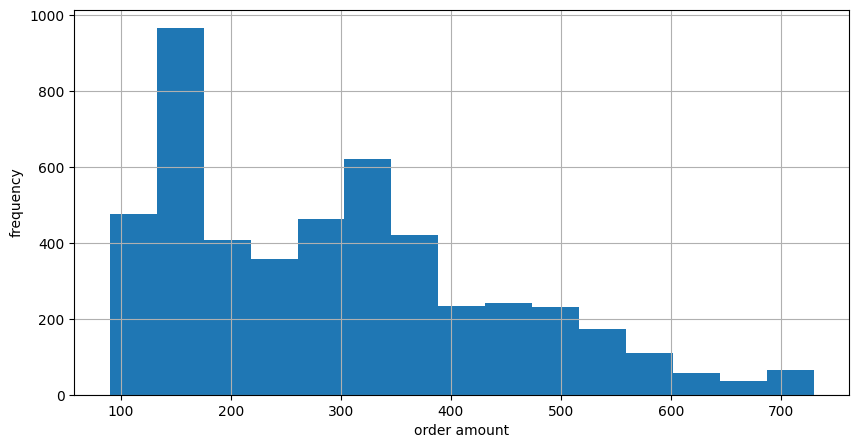

In [66]:
plt.style.use('default')
plt.xlabel("order amount")
plt.ylabel("frequency")
new_df['order_amount'].hist(bins=15, figsize=(10,5))
plt.show()

# This Method of removing outliers is OK, but we can do better. By just focusing on the IQR of order amount, we removed any outliers regardless of number of items (sneakers) that directly correlate to it. For example, we may have gotten rid of a 1700 dollar order because it was out of range, but it consisted of 5 items, which makes sense!

## I proceed to create an order amount per item column and add it to the dataframe

In [67]:
d['order_amount per item'] = d['order_amount']/d['total_items']
d
d.describe()

,order_id,shop_id,user_id,order_amount,total_items,order_amount per item
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


## I then perform a similar outlier detection technique as I did above

In [68]:
#Calculating the IQR value of order amount
q1 = d.describe()['order_amount per item']['25%']
q3 = d.describe()['order_amount per item']['75%']
IQR = q3 - q1
print(IQR)

36.0


In [69]:
iqr_out_low = d['order_amount per item'] < (q1 - 1.5 * IQR)
iqr_out_high = d['order_amount per item'] > (q3 + 1.5 * IQR)

In [70]:
iqr_out_high.value_counts()

False    4903
True       97
Name: order_amount per item, dtype: int64

## Notice here, we detected 97 outliers, instead of 141 outliers from the method we used a few lines above. That means we get to preserve some more data, making out future analysis more accurate!

In [71]:
d.sort_values(by='order_amount',ascending=False).head(97)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount per item
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
...,...,...,...,...,...,...,...,...
3865,3866,68,815,816,6,debit,2017-03-11 9:31:50,136.0
1123,1124,29,911,815,5,credit_card,2017-03-26 0:53:49,163.0
771,772,19,818,815,5,debit,2017-03-07 8:48:16,163.0
3927,3928,97,979,810,5,credit_card,2017-03-11 7:37:13,162.0


In [72]:
new_df = d[iqr_out_high == False] 
new_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount per item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [73]:
new_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,order_amount per item
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


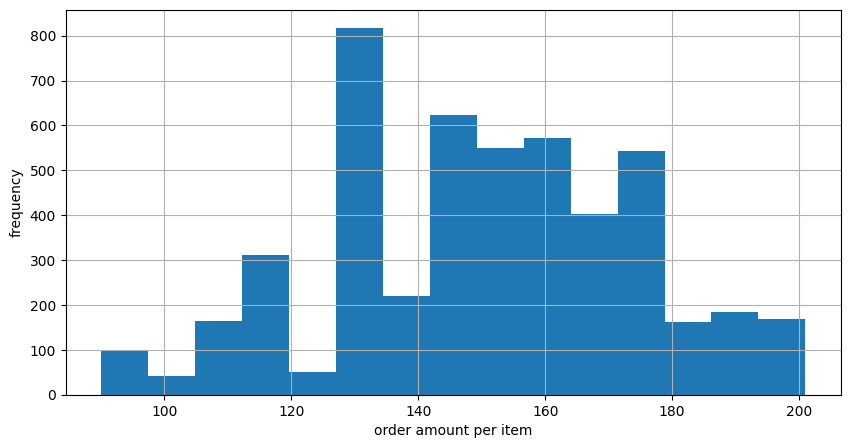

In [76]:
#Distribution of order amount per item
plt.style.use('default')
plt.xlabel("order amount per item")
plt.ylabel("frequency")
new_df['order_amount per item'].hist(bins=15, figsize=(10,5))
plt.show()

In [78]:
new_df.sort_values(by='order_amount per item',ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount per item
3601,3602,12,987,201,1,debit,2017-03-09 8:42:23,201.0
2228,2229,12,813,201,1,debit,2017-03-02 10:52:05,201.0
4900,4901,12,774,603,3,debit,2017-03-10 17:48:32,201.0
1194,1195,12,950,201,1,debit,2017-03-07 16:21:52,201.0
107,108,12,732,201,1,credit_card,2017-03-21 20:26:18,201.0
...,...,...,...,...,...,...,...,...
368,369,92,906,180,2,cash,2017-03-05 0:22:59,90.0
2912,2913,92,942,180,2,debit,2017-03-18 11:43:55,90.0
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01,90.0
2871,2872,92,854,180,2,cash,2017-03-09 19:25:11,90.0


Final Answers: 

Assumptions: Given that the sneaker shops only sell one shoe model, and that all models are at an affordable price, I did my analysis of AOV based on the data of the collective stores. In practice, however, individual businesses analyze their own AOV's and other central tendency metrics to make business and marketing decisions.

**a)** It is not good practice to fixate on only one measure of central tendency when analyzing data. An AOV of 3145 dollars (total revenue/number of orders) is way to expensive to be the average price a customer pays on an order, specially if all items are assumed to be affordable. Additionally, a standard deviation of 41,282 dollars is HUGE, indicating a wide spread of order amounts. Furthermore, an average of around 8 items sold per order seem steep and unrealistic. When I took a quick look at the most expensive orders, I found red flags with the biggest one being the fact that user 607 ordered 704,000 worth of sneakers 17 times from shop 42 all in the same month of March of 2017, spending around 12 million on sneakers. Now, either this billionaire user's bank doesnt impose a credit limit on their card or its a major data error in the set...lets go with the latter option!

Having said all that, there is clear evidence that outlier data in this set are negatively skewing the distribution of order amount. That is why when we take the AOV, we arrive at a skewed expensive number that is a misrepresentation of customer behavior regarding these 100 sneaker shops. Therefore, no effective business or marketing decisions can be made off this number.

A better way to evaluate this data is to either look at other central tendency metrics as a starting point or clean up the data from outliers and report the new AOV. In terms of a starting point, we can evaluate the average order value based on the median or mode of the data. Another way to go about it is to remove outliers that are assumed to be errors and recaculate central tendency metrics. I did that by creating a new column in our dataframe of order_amount/total_items to obtain the price paid per item for every order. I then removed any outlier orders in this column via the IQR method assuming these odd outliers to be pure errors in the set and recalculated the central tendencies of the new set. 

**b)** The mode of the raw data set at the intial stage and/or further analysis and thorough outlier removal and then recalculating mean. The mode is a great metric as it represents the most frequent price paid by customers (repeated 87 times out of 258 unique order amounts) and thus captures a confident idea of customer behavior towards the 100 stores. After outlier removal, the maximum per item price paid in any store was 201 dollars, which I would be confident in categorizing as an affordable sneaker on the higher end.

**c)** Mode of raw data set = 153 Dollars. Mean of clean data set = 300.1 Dollars. Although, I would definitely recommend observing all measures of central tendencies (median, mode, mean).